In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets

In [2]:
# etapa exploratoria
#df = pd.read_csv("data/2020-03-23_1930.csv", sep=";", decimal = ",")
#df.tail()

## Por provincia

### Cargo manualmente los casos nuevos cada día en una planilla ``ods`` (libreoffice) que exporto al csv de acá abajo:

In [3]:
prov = pd.read_csv("data/totales_x_provincia_toViz.csv", sep=",")
prov.tail()

fecha provincia  casos_diarios Unnamed: 3
2663  2020-06-26   Tucumán              1        NaN
2664  2020-06-26  San Juan              0        NaN
2665  2020-06-26  La Rioja              1        NaN
2666  2020-06-26    Chubut             10        NaN
2667  2020-06-26   Formosa             25        NaN

In [4]:
prov.loc[prov["provincia"]=="Ciudad de Buenos Aires","provincia"]="CABA"
prov.loc[prov["provincia"]=="Buenos Aires","provincia"]="Bs As"
prov.loc[prov["provincia"]=="Santiago Del Estero","provincia"]="S del Estero"
prov.loc[prov["provincia"]=="Tierra Del Fuego","provincia"]="T del Fuego"
prov.tail(23)

fecha     provincia  casos_diarios Unnamed: 3
2645  2020-06-26         Bs As           1692        NaN
2646  2020-06-26         Chaco             76        NaN
2647  2020-06-26          CABA            967        NaN
2648  2020-06-26       Córdoba              8        NaN
2649  2020-06-26    Corrientes              0        NaN
2650  2020-06-26    Entre Ríos             19        NaN
2651  2020-06-26         Jujuy             27        NaN
2652  2020-06-26      La Pampa              0        NaN
2653  2020-06-26       Mendoza              3        NaN
2654  2020-06-26      Misiones              1        NaN
2655  2020-06-26       Neuquén             31        NaN
2656  2020-06-26     Río Negro             13        NaN
2657  2020-06-26         Salta              0        NaN
2658  2020-06-26      San Luis              0        NaN
2659  2020-06-26    Santa Cruz              0        NaN
2660  2020-06-26      Santa Fe             12        NaN
2661  2020-06-26  S del Estero              0        NaN
2662  2020-06-26   T del Fuego              0        NaN
2663  2020-06-26       Tucumán              1        NaN
2664  2020-06-26      San Juan              0        NaN
2665  2020-06-26      La Rioja              1        NaN
2666  2020-06-26        Chubut             10        NaN
2667  2020-06-26       Formosa             25        NaN

In [5]:
last_date = prov.iloc[len(prov)-1,0]
last_date = f"{last_date.split('-')[2]}/{last_date.split('-')[1]}/{last_date.split('-')[0]}"

### Creo nueva columna con los casos acumulados

In [6]:
lista_prov = list(prov["provincia"].unique())

In [7]:
prov["casos_acum"] = ""

In [8]:
for provincia in lista_prov:
    ind = prov["provincia"] == provincia
    acum = prov[ind]["casos_diarios"].cumsum()
    prov.loc[ind,"casos_acum"] = acum

In [9]:
prov.tail(23)[["provincia","casos_acum"]]

provincia casos_acum
2645         Bs As      26337
2646         Chaco       1830
2647          CABA      23710
2648       Córdoba        605
2649    Corrientes        128
2650    Entre Ríos        241
2651         Jujuy         71
2652      La Pampa          7
2653       Mendoza        154
2654      Misiones         42
2655       Neuquén        416
2656     Río Negro        801
2657         Salta         25
2658      San Luis         10
2659    Santa Cruz         51
2660      Santa Fe        405
2661  S del Estero         22
2662   T del Fuego        150
2663       Tucumán         71
2664      San Juan          8
2665      La Rioja         75
2666        Chubut        114
2667       Formosa         70

### Chequeo casos totales hasta la fecha

In [10]:
prov["casos_diarios"].sum()

55343

### Armo un dict con fecha y totales diarios y acumulados
Se puede mejorar y hacerlo todo con pandas, pero ya lo hice

In [11]:
fechas = list(prov["fecha"].unique())
total_diario = {"fecha":[], "total":[], "acum":[]}
acum = 0
for fecha in fechas:
    ind = prov["fecha"] == fecha
    total_diario["fecha"].append(fecha) 
    total_diario["total"].append(prov[ind]["casos_diarios"].sum())
    acum += total_diario["total"][-1]
    total_diario["acum"].append(acum)

In [12]:
prov.tail(23)

fecha     provincia  casos_diarios Unnamed: 3 casos_acum
2645  2020-06-26         Bs As           1692        NaN      26337
2646  2020-06-26         Chaco             76        NaN       1830
2647  2020-06-26          CABA            967        NaN      23710
2648  2020-06-26       Córdoba              8        NaN        605
2649  2020-06-26    Corrientes              0        NaN        128
2650  2020-06-26    Entre Ríos             19        NaN        241
2651  2020-06-26         Jujuy             27        NaN         71
2652  2020-06-26      La Pampa              0        NaN          7
2653  2020-06-26       Mendoza              3        NaN        154
2654  2020-06-26      Misiones              1        NaN         42
2655  2020-06-26       Neuquén             31        NaN        416
2656  2020-06-26     Río Negro             13        NaN        801
2657  2020-06-26         Salta              0        NaN         25
2658  2020-06-26      San Luis              0        NaN         10
2659  2020-06-26    Santa Cruz              0        NaN         51
2660  2020-06-26      Santa Fe             12        NaN        405
2661  2020-06-26  S del Estero              0        NaN         22
2662  2020-06-26   T del Fuego              0        NaN        150
2663  2020-06-26       Tucumán              1        NaN         71
2664  2020-06-26      San Juan              0        NaN          8
2665  2020-06-26      La Rioja              1        NaN         75
2666  2020-06-26        Chubut             10        NaN        114
2667  2020-06-26       Formosa             25        NaN         70

### Gráficos barras animado

In [13]:
max_acum = prov["casos_acum"].max()
fig = px.bar(prov, x="provincia", y="casos_acum",color="provincia",
             animation_frame="fecha", animation_group="provincia", range_y=[0, max_acum+10],
             labels={'provincia':'<b>Provincias</b>', 'casos_acum':'casos acumulados'})#, height=450, width=660)
fig.update_layout(title_text=f'Provincias al {last_date}')
#fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.update_layout(showlegend=False)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 5
fig.show(config={'displayModeBar': True})

In [14]:
fig.write_html("graphs/barras_provincias_anim.html", include_plotlyjs="", full_html=False)

## Totales argentina y diarios

- https://plotly.com/python/text-and-annotations/
- https://plotly.com/python/legend/

**colores:** aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [15]:
pcr = pd.read_csv("data/test_PCR.csv", sep=",")
pcr.fillna(0, inplace=True)
pcr.tail()

fecha  test_acum  test_diarios
111  2020-06-22        0.0        6441.0
112  2020-06-23        0.0        7826.0
113  2020-06-24        0.0        7654.0
114  2020-06-25        0.0        7530.0
115  2020-06-26        0.0           0.0

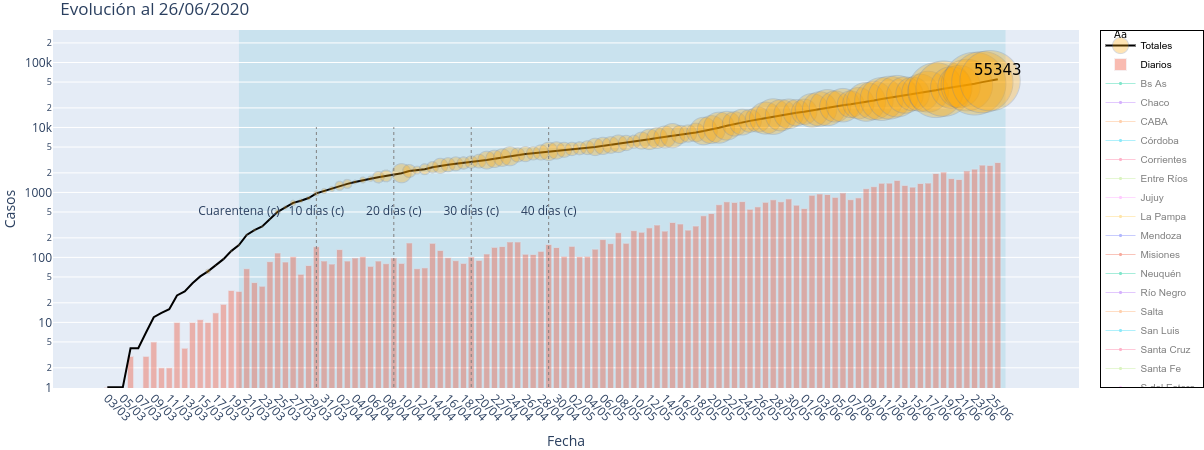

In [17]:
fig = go.Figure()
fechas = list(prov["fecha"].unique())
cant_test = ["-" if td==0 else str(int(td)) for td in pcr["test_diarios"]]


fig.add_trace(go.Scatter(x = total_diario["fecha"], y=total_diario["acum"], mode='lines+markers+text',  
                         line=dict(width=2, color="black"), name="Totales", 
                         hoverinfo="text",
                         text=[""]*(len(total_diario["fecha"])-1)+[total_diario["acum"][-1]],
                         textposition='top center',
                         textfont=dict( family="sans serif",
                                        size=15,
                                        color="black"
                                    ),
                         hovertext= ["Fecha: "+ fecha+"<BR>"+"Casos acumulados: "+str(casos_acum) +"<BR>Tests del día:"+test_diario for fecha,casos_acum,test_diario in zip(total_diario["fecha"],total_diario["acum"], cant_test)],
                         opacity=1,
                         marker=dict(color='orange',
                                     size=np.array(pcr["test_diarios"])*0.008,
                                     line=dict(color='gray', width=1),
                                     opacity=0.3
                                    )
                        )
             )
fig.add_trace(go.Bar(x = total_diario["fecha"], y=total_diario["total"], name="Diarios",opacity=0.4, text=total_diario["total"]))
#fig.add_trace(go.Bar(x = pcr["fecha"], y=pcr["test_diarios"], name="Test x día", opacity=0.4, text=pcr["test_diarios"]))

nom_provincias = {"Ciudad de Buenos Aires":"CABA", "Santiago Del Estero": "S. del Estero", "Tierra Del Fuego":"T. del Fuego", "Buenos Aires":"Bs As"}
for provincia in lista_prov:
    ind = prov["provincia"] == provincia
    #dia = list(range(1,len(ind)))
    fig.add_trace(go.Scatter(x = prov.loc[ind,"fecha"], y=prov.loc[ind,"casos_acum"], text=nom_provincias.get(provincia, provincia), mode='lines+markers', #x = dia
                             line=dict(width=0.7),
                             #stackgroup='one',
                             visible='legendonly', # arrancan apagadas
                             name=nom_provincias.get(provincia, provincia),
                             marker=dict(
                                     size=3,
                                    )
                            )
                 )

# texto última cantidad total / lo comento pq está agregado en el scatter
#ultimo_val = total_diario["acum"][-1]
#fig.add_trace(go.Scatter(
#    x=[fecha,],
#    y=[ultimo_val+500,],
#    text=[ultimo_val,],
#    mode="text",
#    showlegend=False,
#    textfont=dict(
#        color="black",
#        size=15,
#        family="Arail",
#    )
#))


# texto inicio cuarentena
fig.add_trace(go.Scatter(
    x=["2020-03-20",],
    y=[500,],
    text=["Cuarentena (c)",],
    mode="text",
    showlegend=False,
))

# fondo cuarentena
fig.update_layout(
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-20",
            y0=0,
            x1="2020-06-27",
            y1=1,
            fillcolor="LightBlue",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
    ]
)    

# texto 10 dias de cuarentena
fig.add_trace(go.Scatter(
    x=["2020-03-30",],
    y=[500,],
    text=["10 días (c)",],
    mode="text",
    showlegend=False,
))

# Linea vertical 10 días de cuarentena 
fig.add_shape(
        dict(
            type="line",
            x0="2020-03-30",
            y0=0,
            x1="2020-03-30",
            y1=10000,
            line=dict(
                color="grey",
                width=1,
                dash="dot",
            )
))

# texto 20 dias de cuarentena
fig.add_trace(go.Scatter(
    x=["2020-04-09",],
    y=[500,],
    text=["20 días (c)",],
    mode="text",
    showlegend=False,
))

# Linea vertical 20 días de cuarentena 
fig.add_shape(
        dict(
            type="line",
            x0="2020-04-09",
            y0=0,
            x1="2020-04-09",
            y1=10000,
            line=dict(
                color="grey",
                width=1,
                dash="dot",
            )
))

# texto 30 dias de cuarentena
fig.add_trace(go.Scatter(
    x=["2020-04-19",],
    y=[500,],
    text=["30 días (c)",],
    mode="text",
    showlegend=False,
))

# Linea vertical 20 días de cuarentena 
fig.add_shape(
        dict(
            type="line",
            x0="2020-04-19",
            y0=0,
            x1="2020-04-19",
            y1=10000,
            line=dict(
                color="grey",
                width=1,
                dash="dot",
            )
))

# texto 40 dias de cuarentena
fig.add_trace(go.Scatter(
    x=["2020-04-29",],
    y=[500,],
    text=["40 días (c)",],
    mode="text",
    showlegend=False,
))

# Linea vertical 40 días de cuarentena 
fig.add_shape(
        dict(
            type="line",
            x0="2020-04-29",
            y0=0,
            x1="2020-04-29",
            y1=10000,
            line=dict(
                color="grey",
                width=1,
                dash="dot",
            )
))


fig.update_layout(
                  title_text=f'Evolución al {last_date}', 
                  yaxis_title="Casos",#height=620,
                  yaxis_range=(-0.01, 5.5), 
                  yaxis_type="log",
                  #xaxis_type="log",
                 )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},#width=750,
    legend=dict(
        #x=0.02,
        #y=1.15,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=10,
            color="black"
        ),
        #bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=1,
        orientation="v",
    ),
    xaxis=go.layout.XAxis(
        tickvals=fechas[slice(0,len(fechas),2)],
        tickangle=45,
        tickformat = '%d/%m',
        title="Fecha",
    )
)

fig.show(config={'scrollZoom': True, 'displayModeBar': True,})

In [18]:
fig.write_html("graphs/total_arg_provincias.html", include_plotlyjs="", full_html=False) # quito cdn porque lo agregué a mano en el template

## SunBurst

- https://plotly.com/python/sunburst-charts/
- https://plotly.com/python/builtin-colorscales/ 

In [19]:
df = prov.tail(23)[["provincia","casos_acum"]]
df["region"]=""

In [20]:
regiones = {"Pampeana" : ["Bs As", "CABA", "Córdoba", "Santa Fe", "La Pampa", "Entre Ríos"],
            "Patagonia": ["T del Fuego", "Río Negro", "Neuquén", "Santa Cruz", "Chubut"],
            "Nordeste" : ["Chaco", "Corrientes", "Misiones", "Formosa"],
            "Noroeste" : ["La Rioja", "Tucumán", "S del Estero", "Jujuy", "Salta"],
            "Cuyo"     : ["Mendoza", "San Luis", "San Juan"],
           }

In [21]:
for reg, list_prov in regiones.items():
    for pro in list_prov:
        ind = df["provincia"] == pro
        df.loc[ind,"region"] = reg

In [22]:
df["pais"]=""
df["pais"]= ["Argentina"]*23
df

provincia casos_acum     region       pais
2645         Bs As      26337   Pampeana  Argentina
2646         Chaco       1830   Nordeste  Argentina
2647          CABA      23710   Pampeana  Argentina
2648       Córdoba        605   Pampeana  Argentina
2649    Corrientes        128   Nordeste  Argentina
2650    Entre Ríos        241   Pampeana  Argentina
2651         Jujuy         71   Noroeste  Argentina
2652      La Pampa          7   Pampeana  Argentina
2653       Mendoza        154       Cuyo  Argentina
2654      Misiones         42   Nordeste  Argentina
2655       Neuquén        416  Patagonia  Argentina
2656     Río Negro        801  Patagonia  Argentina
2657         Salta         25   Noroeste  Argentina
2658      San Luis         10       Cuyo  Argentina
2659    Santa Cruz         51  Patagonia  Argentina
2660      Santa Fe        405   Pampeana  Argentina
2661  S del Estero         22   Noroeste  Argentina
2662   T del Fuego        150  Patagonia  Argentina
2663       Tucumán         71   Noroeste  Argentina
2664      San Juan          8       Cuyo  Argentina
2665      La Rioja         75   Noroeste  Argentina
2666        Chubut        114  Patagonia  Argentina
2667       Formosa         70   Nordeste  Argentina

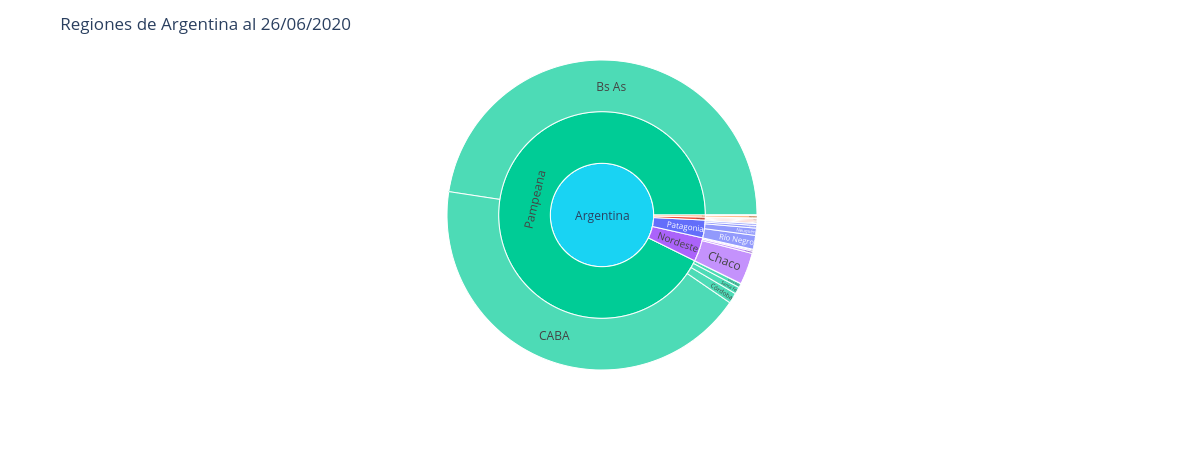

In [23]:
fig = px.sunburst(df, path=["pais",'region', 'provincia'], values='casos_acum', color='region', color_continuous_scale='deep',
                  hover_name="casos_acum",#hover_data=['provincia']
                 )
fig.update_traces(
        go.Sunburst(hovertemplate='<b>%{label} </b> <br> %{value} casos'),
        #insidetextorientation='radial',       
    )
fig.update_layout(title=f"Regiones de Argentina al {last_date}")
fig.write_html("graphs/regiones_sunburst.html", include_plotlyjs="", full_html=False)
fig.show()

## Agrego widget para seleccionar log

### De este modo solo lo veo en jupyter, no en el html generado

In [13]:
log = widgets.Dropdown(
    options=["log", "lineal"],
    value="lineal",
    description='Escala eje y: ',
)

In [14]:
trazas_provincias = list()

for provincia in lista_prov:
    ind = prov["provincia"] == provincia
    trazas_provincias.append(go.Scatter(x = prov.loc[ind,"fecha"], y=prov.loc[ind,"casos_acum"],
                             hoverinfo='y',
                             mode='lines+markers',
                             line=dict(width=0.5),
                             stackgroup='one', # define stack group
                             name=provincia,)
                             )

trazas_provincias.append(go.Scatter(x = prov.loc[ind,"fecha"], y=DPenazzi,  line=dict(width=2, dash='dash', color='royalblue'), 
                             name="Aprox. DPenazzi"))


g = go.FigureWidget(data=trazas_provincias)

g.layout.xaxis.title = 'Fecha'
g.layout.yaxis.title = 'Casos'
g.layout.title = 'Evolución de casos en de covid-19 por Provincia al 28/03/2020'

In [15]:
def escala(change):
    with g.batch_update():
        if log.value == "log":
            g.layout.yaxis.type = 'log'
        else:
            g.layout.yaxis.type = 'linear'

log.observe(escala, names="value")

In [16]:
container = widgets.HBox([log])
widgets.VBox([container,g])

<module 'ipywidgets.widgets.widget_output' from '/home/emiliano/anaconda3/lib/python3.7/site-packages/ipywidgets/widgets/widget_output.py'>

## Abandonados a su suerte

Acá dejo lo que fui haciendo y finalmente descarté

### Gráfico área apilado por provincias

In [23]:
fig = px.area(prov, x="fecha", y="casos_acum", color="provincia", height=750,
             labels={'provincia':'<b>Provincias</b>', 'casos_acum':'Casos Acumulados', "fecha":"Fecha"})
fig.update_layout(title_text='Evolución de covid-19 por Provincia al 8/04/2020',#yaxis_type="log",
                 xaxis_rangeslider_visible=True)
fig.show()

## Agrego aproximación de Daniel Penazzi

Para agregar curvas no puedo usar plotly express, tengo que usar graph objects y es un bardo, pero mas o menos salió:

- https://twitter.com/DPenazzi/status/1239215593385078786?s=20

$$f(t) = (3.3327)*(1.2405)^t, t\ge1$$

In [61]:
t = np.array(range(1,28))
DPenazzi=(3.3327)*(1.2405)**t

In [62]:
DPenazzi

array([   4.13421435,    5.1284929 ,    6.36189544,    7.8919313 ,
          9.78994078,   12.14442153,   15.06515491,   18.68832467,
         23.18286675,   28.7583462 ,   35.67472846,   44.25450066,
         54.89770807,   68.10060686,   84.47880281,  104.79595488,
        129.99938203,  161.26423341,  200.04828154,  248.15989325,
        307.84234758,  381.87843217,  473.72019511,  587.64990203,
        728.97970347,  904.29932215, 1121.78330913])

## Uso graphic object

In [1]:
fig = go.Figure()
fechas = list(prov["fecha"].unique())
for provincia in lista_prov:
    ind = prov["provincia"] == provincia
    #x = list(range(1,len(ind)))    
    fig.add_trace(go.Scatter(x = prov.loc[ind,"fecha"], y=prov.loc[ind,"casos_acum"], text=provincia, mode='lines+markers',#x = x
                             line=dict(width=0.5),
                             stackgroup='one', # define stack group
                             name=provincia,))
    
#fig.add_trace(go.Scatter(x = prov.loc[ind,"fecha"], y=DPenazzi, text="Aprox DPenazzi", line=dict(width=2, dash='dash', color='royalblue'), name="Aprox. DPenazzi"))
#fig.add_trace(go.Scatter(x = total_diario["fecha"], y=total_diario["total"],  line=dict(width=2, color='red'), name="Diarios",mode='lines+markers',))

fig.update_layout(#yaxis_range=(0, 905), 
                  title_text='Evolución de casos en de covid-19 por Provincia al 31/03/2020', 
                  height=750, xaxis_title="Fecha", yaxis_title="Casos (log)",
                  #yaxis_type="log",
                xaxis_type="log",
                 )
fig.update_layout(
    legend=dict(
        #x=0.02,
        #y=1.15,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=10,
            color="black"
        ),
        #bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=1,
        orientation="v",
    ),
    title={
        #'y':1.,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=go.layout.XAxis(
        #ticktext=fechas,
        tickvals=fechas
    )
)
fig.show()

NameError: name 'go' is not defined

In [ ]:
fig.write_html("graphs/total_arg_provincias.html", include_plotlyjs="cdn", full_html=False)

Formatear fechas:

```
    fig.update_layout(
    ...
    xaxis=go.layout.XAxis(
        tickformat = '%d/%m'
    )
    )
    
    %a - abbreviated weekday name.*
    %A - full weekday name.*
    %b - abbreviated month name.*
    %B - full month name.*
    %c - the locale's date and time, such as %x, %X.*
    %d - zero-padded day of the month as a decimal number [01,31].
    %e - space-padded day of the month as a decimal number [ 1,31]; equivalent to %_d.
    %f - microseconds as a decimal number [000000, 999999].
    %H - hour (24-hour clock) as a decimal number [00,23].
    %I - hour (12-hour clock) as a decimal number [01,12].
    %j - day of the year as a decimal number [001,366].
    %m - month as a decimal number [01,12].
    %M - minute as a decimal number [00,59].
    %L - milliseconds as a decimal number [000, 999].
    %p - either AM or PM.*
    %Q - milliseconds since UNIX epoch.
    %s - seconds since UNIX epoch.
    %S - second as a decimal number [00,61].
    %u - Monday-based (ISO 8601) weekday as a decimal number [1,7].
    %U - Sunday-based week of the year as a decimal number [00,53].
    %V - ISO 8601 week of the year as a decimal number [01, 53].
    %w - Sunday-based weekday as a decimal number [0,6].
    %W - Monday-based week of the year as a decimal number [00,53].
    %x - the locale's date, such as %-m/%-d/%Y.*
    %X - the locale's time, such as %-I:%M:%S %p.*
    %y - year without century as a decimal number [00,99].
    %Y - year with century as a decimal number.
    %Z - time zone offset, such as -0700, -07:00, -07, or Z.
    %{n}f for fractional seconds with n digits. For example, 2016-10-13 09:15:23.456 with tickformat %H~%M~%S.%2f would display 09~15~23.46*
    %% - a literal percent sign (%).
```